In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
df = pd.read_csv('/content/drive/My Drive/Projects/GOT/got_scripts_breakdown.csv', delimiter=';')
print(df.shape)
df.head()

(22510, 8)


,Column1,Season,Episode,Sentence,Name,N_serie,N_Season,Emision Date
0,1,Season 1,winter is coming,What d’you expect? They’re savages One lot ste...,waymar royce,1,1,17/04/2011
1,2,Season 1,winter is coming,I’ve never seen wildlings do a thing like this...,will,1,1,17/04/2011
2,3,Season 1,winter is coming,How close did you get?,waymar royce,1,1,17/04/2011
3,4,Season 1,winter is coming,Close as any man would,will,1,1,17/04/2011
4,5,Season 1,winter is coming,We should head back to the wall,gared,1,1,17/04/2011


We will first see how many null values are present

In [4]:
df.isnull().sum()

Column1          0
Season           0
Episode          0
Sentence         0
Name            11
N_serie          0
N_Season         0
Emision Date     0
dtype: int64

Dropping the null 'Name' rows since we have got only 11 of those (out of 22510)

In [6]:
df.dropna(inplace = True)
df.reset_index(inplace = True)

In [7]:
print('No. of seasons:', df.Season.nunique())
print('No. of episodes:', df.Episode.nunique())

No. of seasons: 7
No. of episodes: 67


In [8]:
import cv2
from PIL import Image
from wordcloud import WordCloud

Let us plot a wordcloud of 1000 words (not considering the stopwords)

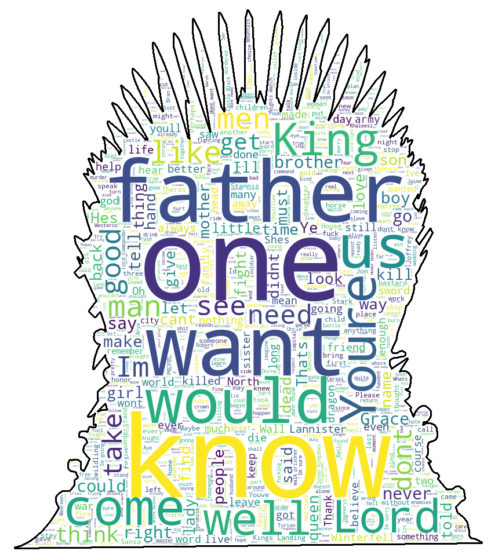

In [9]:
comment_words = '' 

for val in df.Sentence: 
    val = str(val) 
    tokens = val.split() 
    comment_words += " ".join(tokens)+" "

img = cv2.imread('/content/drive/My Drive/Projects/GOT/images/ironThrone.jpg')
ret,mask = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

wordcloud = WordCloud(background_color="white", max_words=1000, mask=mask, stopwords=stop_words, contour_width=2, contour_color='black')
wordcloud.generate(comment_words)

plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Word frequency

Total no. of words - 10146

Top 30 most frequent words -

['the' ',' 'you' 'i' 'to' '?' 'a' 'and' 'of' '’' 'your' 'it' 'my' 'me'
 'is' 'in' 'for' 'he' 'that' 'have' 'we' 'not' 'what' 'be' 'do' 'no' 'are'
 'was' 'with' 'they']



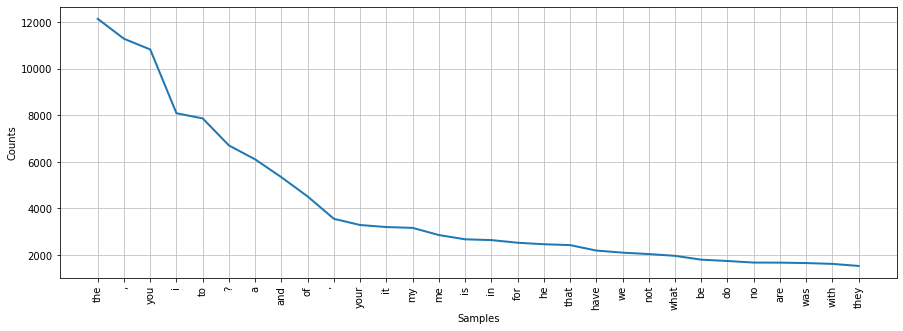

In [10]:
reviews = df.Sentence.str.cat(sep=' ')
reviews = reviews.lower()

tokens = word_tokenize(reviews)
frequency_dist = nltk.FreqDist(tokens)

print('Total no. of words -', len(set(tokens)))
print('\nTop 30 most frequent words -\n')
print(np.array(sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)).ravel()[0:30])
print()

plt.figure(figsize = (15, 5), facecolor = None) 
frequency_dist.plot(30,cumulative=False)

There are many stopwords which we can remove and plot again to get the word frequency

Word frequency after removing the stopwords

Total no. of words after stopwords removal - 9969

Top 30 most frequent words after stopwords removal -

['know' 'lord' 'one' 'dont' 'im' 'like' 'us' 'want' 'king' 'youre' 'would'
 'men' 'man' 'father' 'come' 'well' 'never' 'good' 'back' 'go' 'think'
 'see' 'get' 'take' 'grace' 'right' 'time' 'need' 'lady' 'could']



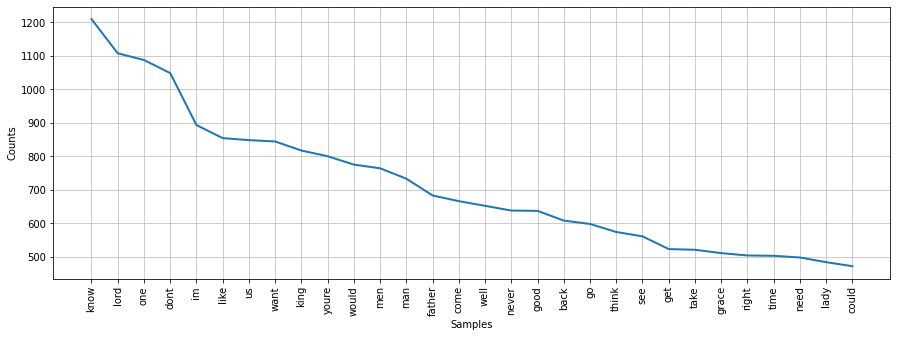

In [11]:
tokens = word_tokenize(reviews)
tokens = [w for w in tokens if not w in stop_words and len(w) > 1]

frequency_dist = nltk.FreqDist(tokens)

print('Total no. of words after stopwords removal -', len(set(tokens)))
print('\nTop 30 most frequent words after stopwords removal -\n')
print(np.array(sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)).ravel()[0:30])
print()

plt.figure(figsize = (15, 5), facecolor = None) 
frequency_dist.plot(30,cumulative=False)

As seen clearly, the scale changes drastically after removing the stopwords. Now the maximum count of words is almost 1200, which earlier was almost 12000 (10x times)

Now let us go deeper and get the most no. of sentences by characters

In [12]:
print('Most no. of sentences by characters:')
print('-' * 50)
print(df.Name.value_counts()[:15])

Most no. of sentences by characters:
--------------------------------------------------
tyrion          1537
cersei           984
jon              954
daenerys         861
jaime            842
sansa            719
arya             690
sam              492
littlefinger     475
davos            468
theon            456
tywin            388
varys            375
bronn            360
jorah            351
Name: Name, dtype: int64


As most of us would have guessed, we have got **Tyrion** as the one who has the most no. of sentences. 

He does "drink 🍷 and \'**know things**\'." 😉


Plotting in a graph

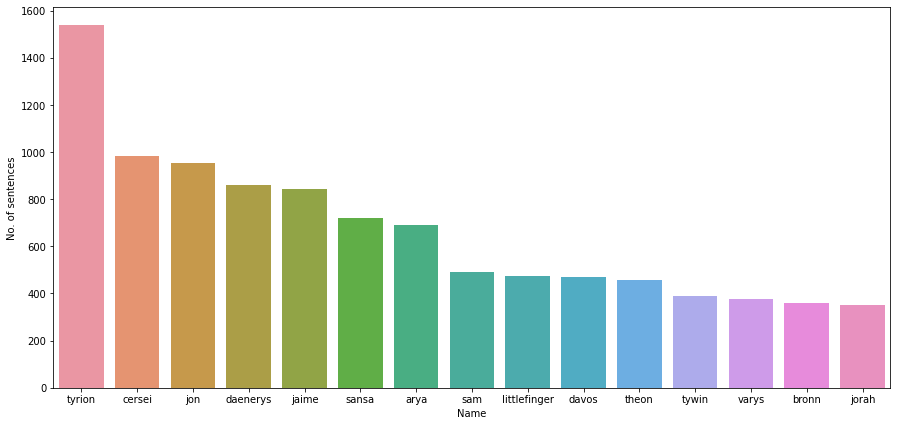

In [13]:
plt.figure(figsize = (15, 7))
sns.barplot(x=df.Name.value_counts().index[:15], y=df.Name.value_counts()[:15])
plt.xlabel('Name')
plt.ylabel('No. of sentences')
plt.show()

What about sentences per season? 

We will plot **Season-wise** sentence frequency of characters


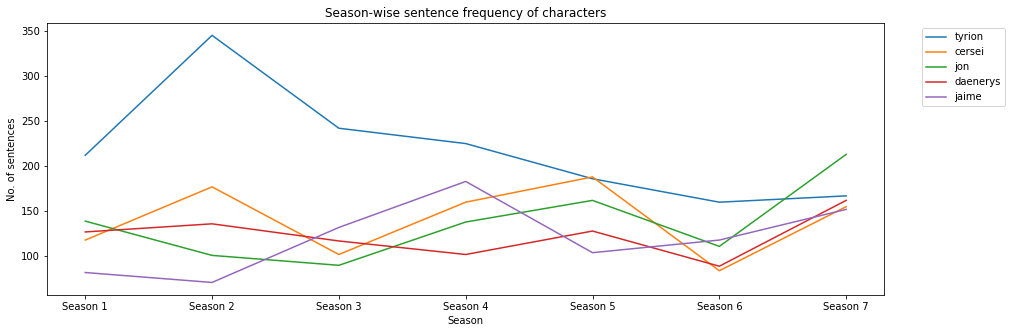

In [14]:
names_list = df.Name.value_counts().index[:5]

season = ['Season 1', 'Season 2', 'Season 3', 'Season 4', 'Season 5', 'Season 6', 'Season 7']

plt.figure(figsize = (15, 5), facecolor = None) 
plt.xlabel('Season')
plt.ylabel('No. of sentences')
plt.title('Season-wise sentence frequency of characters')

for name in names_list:
  sentence_count = df[df.Name == name].groupby('Season').count().reindex(season)['Sentence']
  last = sentence_count.last_valid_index()
  plt.plot(sentence_count[:last].fillna(0), label = name)
  plt.legend(loc = "upper right", bbox_to_anchor = (1.15, 1))
